In [22]:
# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [23]:
# Read the diabetes dataset into a DataFrame
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
# Assuming the target variable is named 'progression'
x = diabetes_data.drop('Progression', axis=1)
y = diabetes_data['Progression']


In [25]:
# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



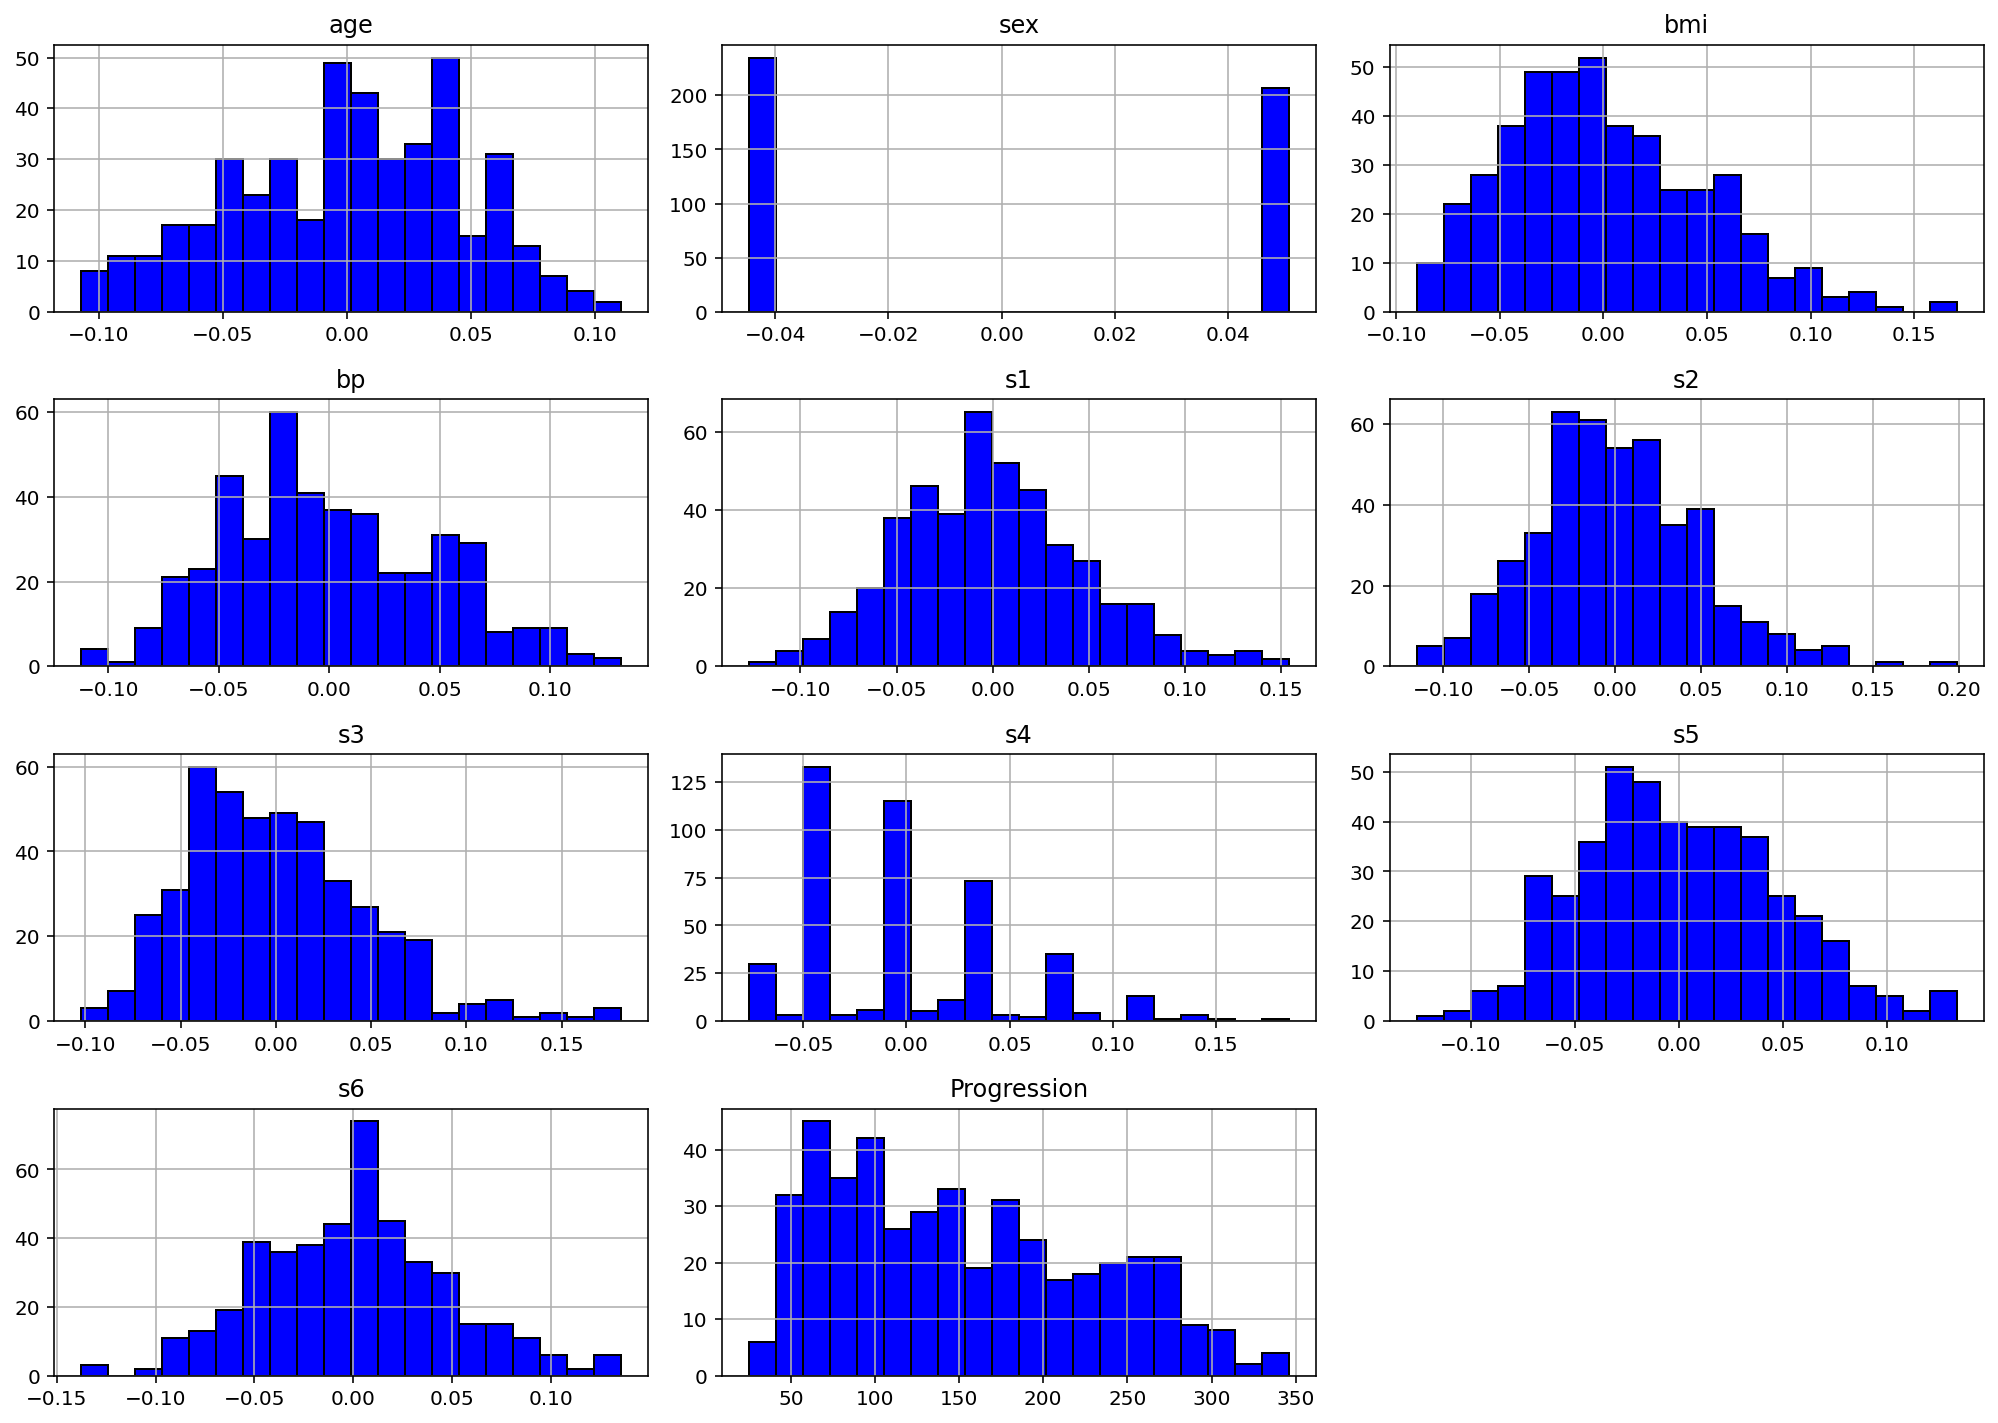

In [26]:
# Create MinMaxScaler and StandardScaler objects
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform the scalers on the training data
x_train_minmax = minmax_scaler.fit_transform(x_train)
x_train_standard = standard_scaler.fit_transform(x_train)

# Transform the test data using the same scalers
x_test_minmax = minmax_scaler.transform(x_test)
x_test_standard = standard_scaler.transform(x_test)

# Plot histograms of each feature in the dataset
diabetes_data.hist(bins=20, figsize=(14,10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()



In [27]:
# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(x_train_standard, y_train)


LinearRegression()

In [28]:
# Print the intercept and coefficients of the trained model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)


Intercept: 153.73654390934846
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


In [29]:
# Generate predictions using the model on the test set
y_pred = regressor.predict(x_test_standard)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.45260276297191904
